In this notebook i have use the cnn for the fruits classification

importing the necessarty library

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,Input
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
import cv2
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

giving he directory path

In [2]:
train="fruits/fruits-360/Training"
test="fruits/fruits-360/Test"

spliting the data for training and testing data and load from the directory

In [29]:
train_gen=image_dataset_from_directory(
    train,
    image_size=(100,100),
    batch_size=32,
    label_mode="categorical",
    shuffle=True,
    color_mode="grayscale"
)

Found 70491 files belonging to 141 classes.


In [30]:
test_gen=image_dataset_from_directory(
    test,
    image_size=(100,100),
    batch_size=32,
    label_mode="categorical",
    shuffle=True,
    color_mode="grayscale"
)

Found 23619 files belonging to 141 classes.


In [31]:
classes=test_gen.class_names

take one sample image and display

In [32]:
img=cv2.imread("fruits/fruits-360/Training/Apple 6/r0_0_100.jpg")

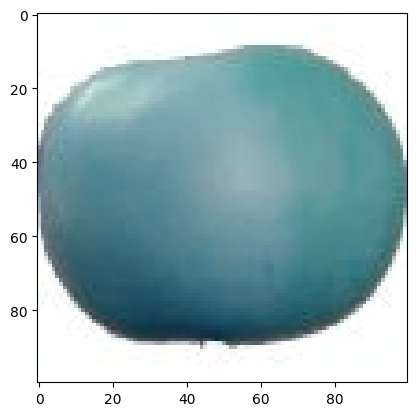

In [33]:
plt.imshow(img)

creating our sequential cnn model

In [34]:
model=Sequential([
    Input((100,100,1)),
    Conv2D(filters=32,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation="relu"),
    Conv2D(filters=64,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(filters=128,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation="relu"),
    Conv2D(filters=256,kernel_size=(3,3),kernel_regularizer=l2(0.001),activation="relu"),
    MaxPool2D(pool_size=(3,3)),
    Dropout(0.3),
    Flatten(),
    Dense(1500,kernel_regularizer=l2(0.001),activation="relu"),
    Dropout(0.3),
    Dense(len(classes),activation="softmax")
])

In [35]:
lr=ReduceLROnPlateau(monitor="loss",factor=0.1,patience=10,verbose=1,mode='auto',min_lr=0.00001,min_delta=0.0001)
ea=EarlyStopping(monitor='loss',patience=10,verbose=1,restore_best_weights=True,min_delta=0.0001,mode="auto")

In [36]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(0.0001),metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 44, 44, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │    75,265,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 141)            │       211,641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,864,981 (289.40 MB)

 Trainable params: 75,864,981 (289.40 MB)

 Non-trainable params: 0 (0.00 B)

Training our model

In [39]:
model.fit(train_gen,epochs=3,callbacks=[lr,ea],verbose=1)

Epoch 1/3
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 3169s 1s/step - accuracy: 0.6080 - loss: 4.3240 - learning_rate: 1.0000e-04
Epoch 2/3
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1914s 869ms/step - accuracy: 0.9778 - loss: 1.6651 - learning_rate: 1.0000e-04
Epoch 3/3
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 3022s 1s/step - accuracy: 0.9856 - loss: 0.9321 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 3.


In [40]:
model.predict(test_gen)

739/739 ━━━━━━━━━━━━━━━━━━━━ 140s 189ms/step


array([[6.3987123e-08, 2.0122021e-10, 2.8407129e-07, ..., 2.4700346e-09,
        5.5316727e-11, 2.6825682e-09],
       [5.6856239e-21, 2.0109090e-17, 4.3380547e-20, ..., 6.2034437e-14,
        1.2221974e-17, 9.7836244e-16],
       [3.3868758e-14, 1.8435863e-12, 2.4815133e-11, ..., 1.4314032e-12,
        5.0513581e-15, 1.5879306e-13],
       ...,
       [4.5342511e-11, 7.7652760e-07, 4.9793343e-06, ..., 4.5439894e-08,
        1.3978189e-12, 1.9164015e-09],
       [3.2462580e-13, 1.9411308e-12, 2.5661431e-11, ..., 2.0216429e-16,
        9.5125569e-16, 3.1616458e-15],
       [8.1147871e-14, 7.0590430e-12, 1.9871266e-15, ..., 9.3489799e-13,
        4.0173712e-14, 1.0331218e-12]], dtype=float32)

display the test images with the sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


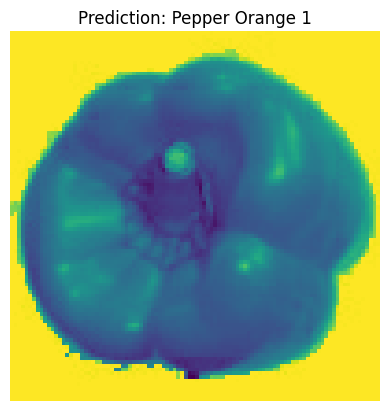

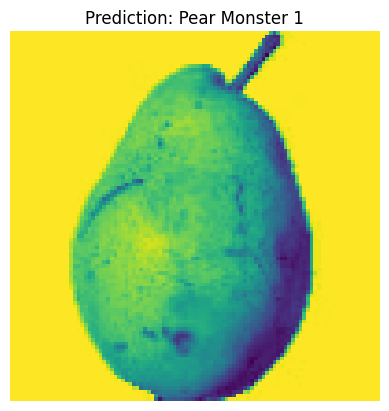

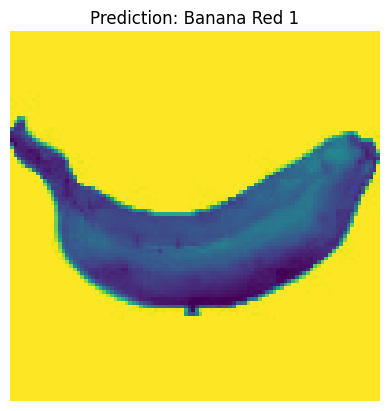

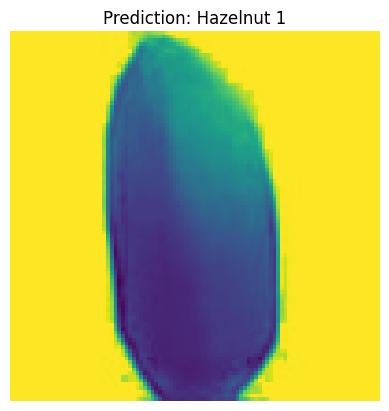

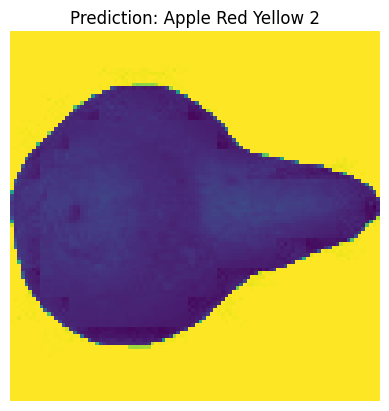

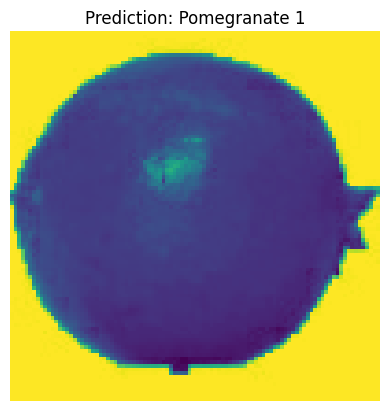

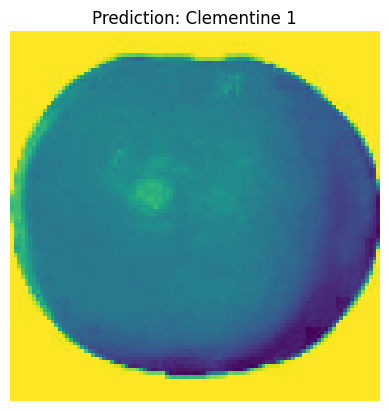

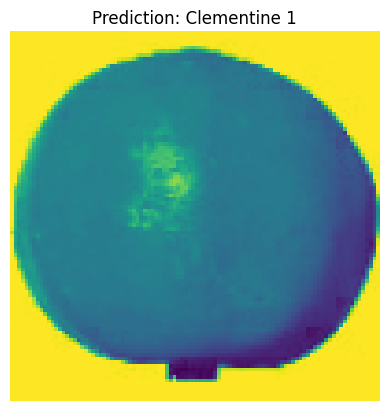

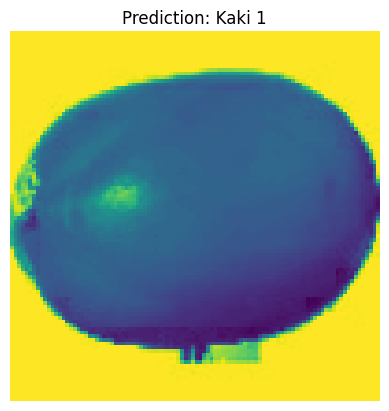

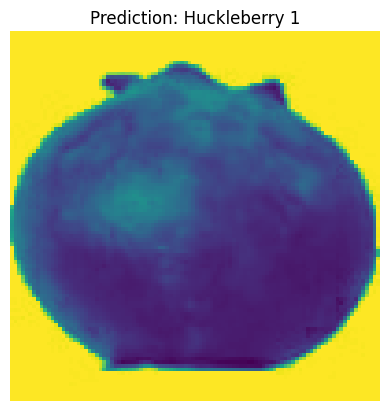

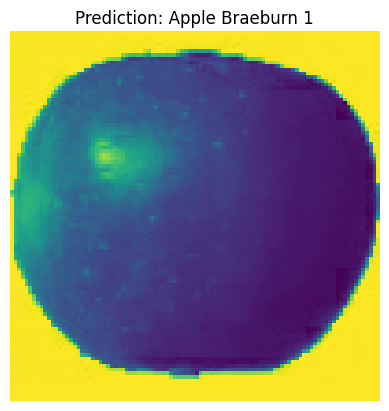

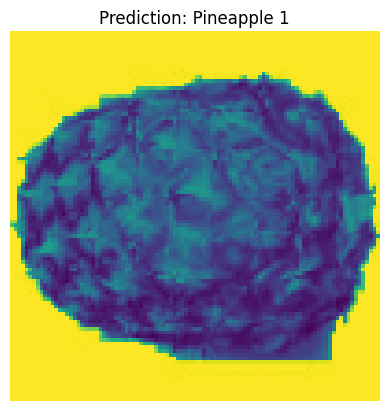

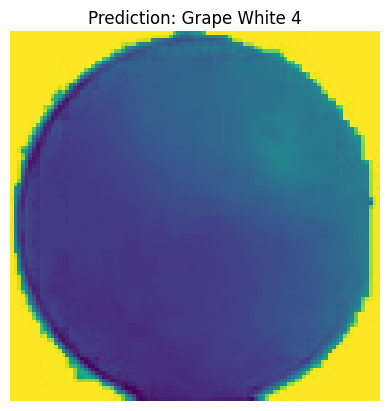

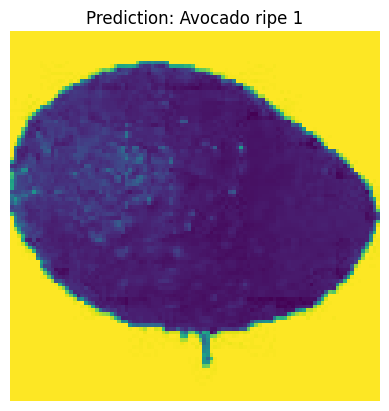

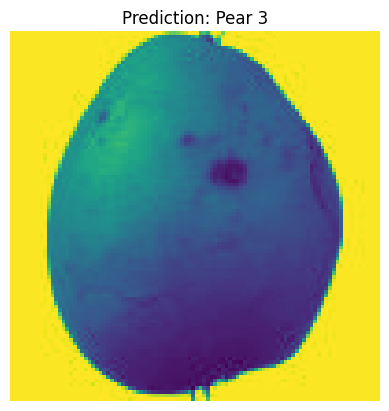

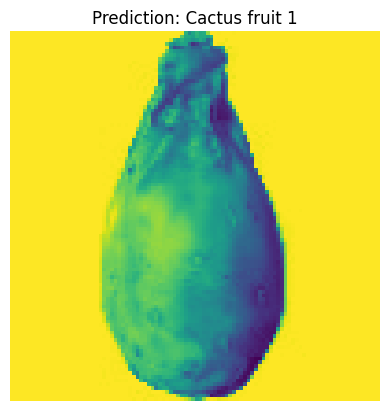

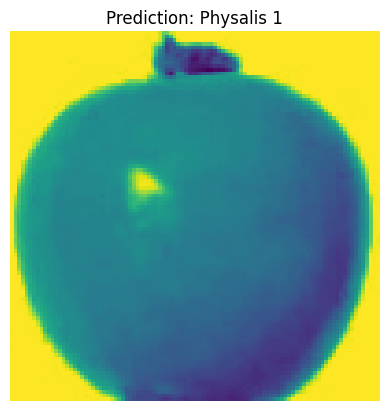

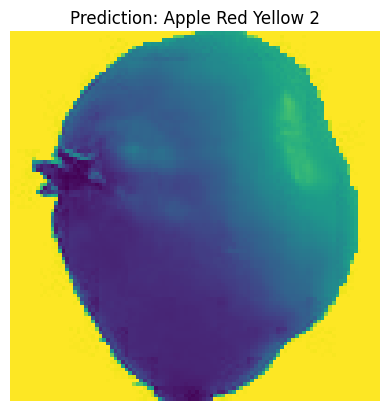

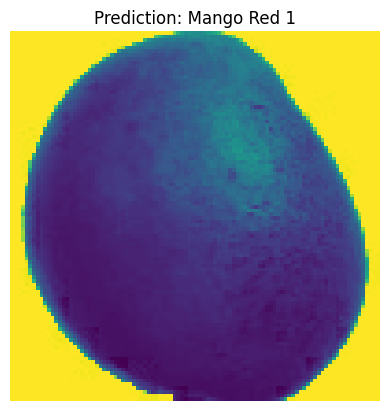

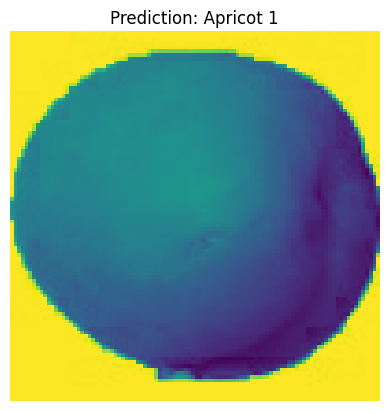

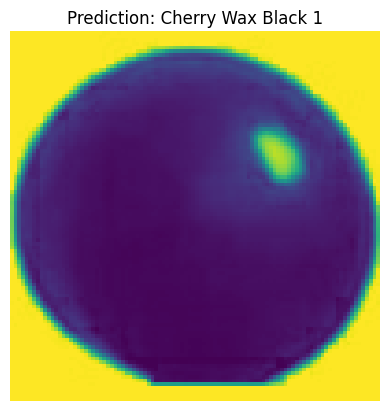

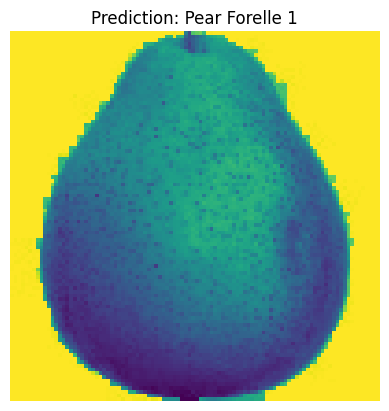

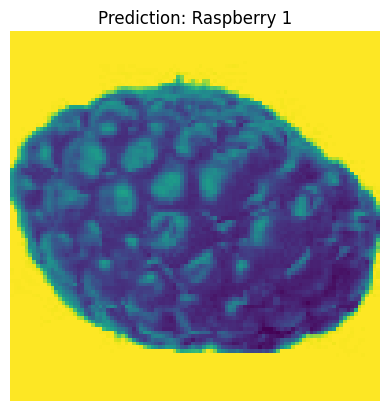

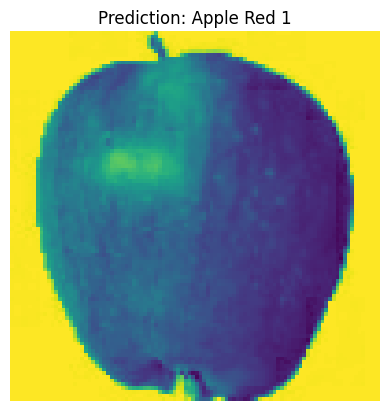

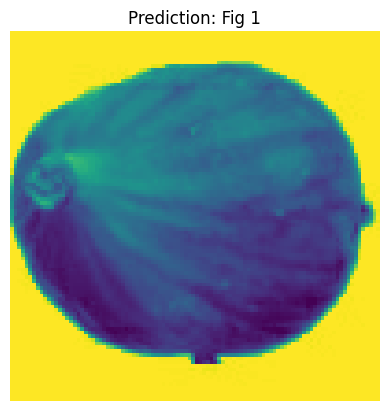

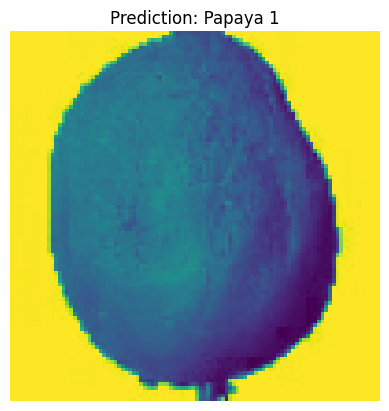

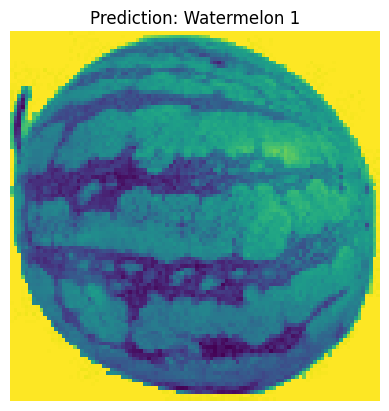

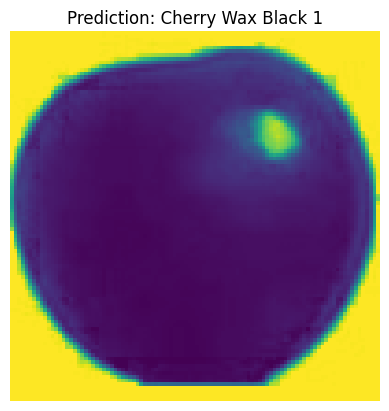

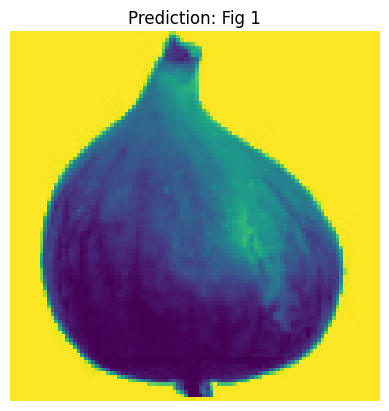

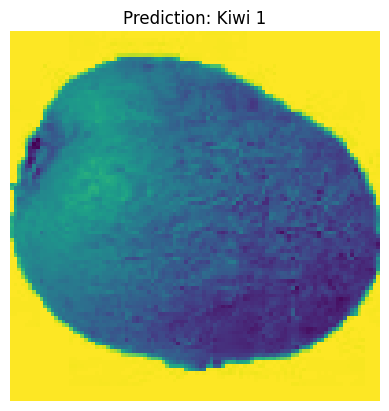

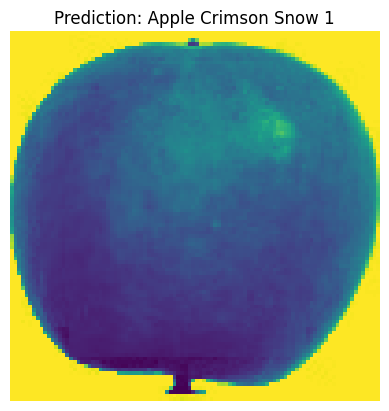

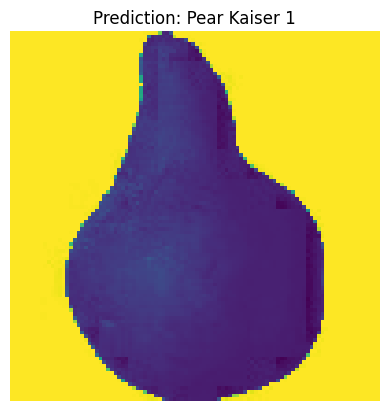

In [41]:
import numpy as np
import matplotlib.pyplot as plt
class_names = classes

# Function to display an image and the predicted label
def display_prediction(image, prediction):
    plt.imshow(image / 255.0)  # Normalize pixel values for display
    plt.title(f"Prediction: {class_names[np.argmax(prediction)]}")
    plt.axis('off')
    plt.show()

# %% Predict on test dataset
for images, labels in test_gen.take(1):  # Get a batch from the test dataset
    predictions = model.predict(images)
    for i in range(len(images)):
        display_prediction(images[i].numpy(), predictions[i])